<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [12]:
# Check for GPU
!nvidia-smi

Tue Apr 11 16:52:40 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:26:00.0  On |                  N/A |
| 48%   35C    P0    N/A /  75W |   1267MiB /  4096MiB |     29%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [13]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device


2.0.0+cu117


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

Overfitting is an undesirable machine learning behavior that occurs when the machine learning model gives accurate predictions for training data but not for new data. When data scientists use machine learning models for making predictions, they first train the model on a known data set. Then, based on this information, the model tries to predict outcomes for new data sets. An overfit model can give inaccurate predictions and cannot perform well for all types of new data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [14]:
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

device = 'cuda' if torch.cuda.is_available() else 'cpu'

train_dataset = datasets.MNIST(root="data",
                               train=True,
                               transform=ToTensor(),
                               download=True,
                               target_transform=None)

test_dataset = datasets.MNIST(root="data",
                              train=False,
                              transform=ToTensor(),
                              download=True,
                              target_transform=None)

In [15]:
train_dataset, test_dataset

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [16]:
classes_names = train_dataset.classes
classes_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## 6. Visualize at least 5 different samples of the MNIST training dataset.

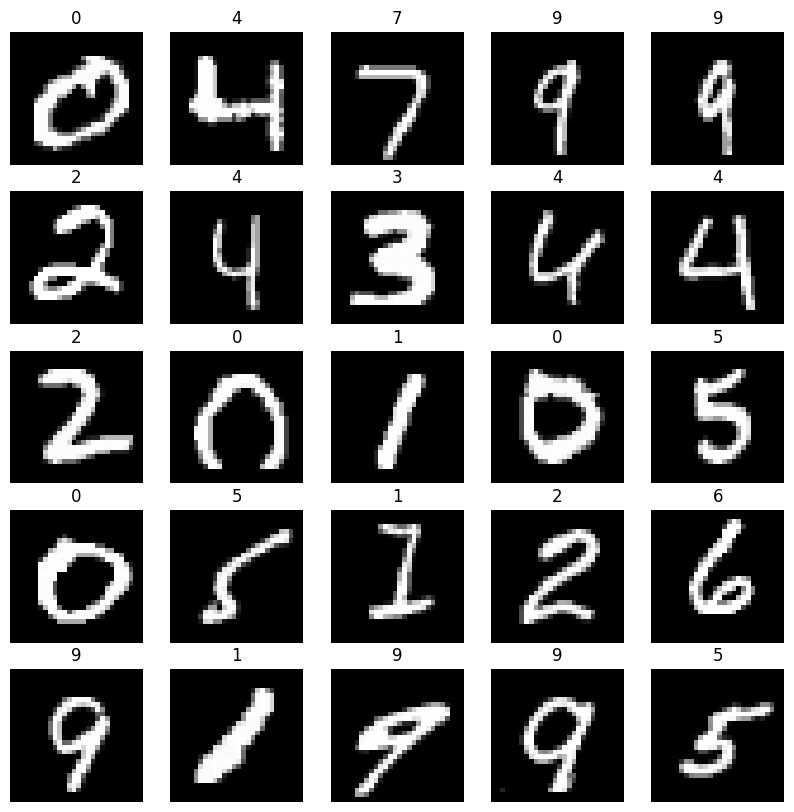

In [17]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
nrows = 5
ncols = 5
for i in range(1,nrows*ncols+1):
    random_idx = torch.randint(0, len(train_dataset.data), size=[1]).item()
    fig.add_subplot(nrows,ncols,i)
    img, label = train_dataset[random_idx]
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(label)
    plt.axis(False)


## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [18]:
from torch.utils.data import DataLoader

batch_size = 32

train_dataloader = DataLoader(dataset=train_dataset,
                              batch_size=batch_size,
                              shuffle=True,
                              )

test_dataloader = DataLoader(dataset=test_dataset,
                             batch_size=batch_size,
                             shuffle=False)

In [19]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f8ad6c885e0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f8ad6cc3730>)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [20]:
from torch import nn

class MNISTmodel_0(nn.Module):
    def __init__(self, 
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int) -> None:
        super().__init__()

        self.conv_block_0 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=(3,3),
                      stride=1,
                      padding=1,
                      device=device),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=(3,3),
                      stride=1,
                      padding=1,
                      device=device),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2))
        )

        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=(3,3),
                      stride=1,
                      padding=1,
                      device=device),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=(3,3),
                      stride=1,
                      padding=1,
                      device=device),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2))
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape,
                      device=device)
        )

    def forward(self, x):
        x = self.conv_block_0(x)
        # print(x.shape)
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.classifier(x)
        return x

In [21]:
device

'cuda'

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [22]:
from tqdm.auto import tqdm
from timeit import default_timer as timer

# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

def train_step(model: torch.nn.Module,
               dataset: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    """Performs a training with model"""

    train_loss, train_acc = 0,0
    
    # Put model into target device 
    model.to(device)

    # Set model into training mode
    model.train()

    for batch, (X,y) in enumerate(dataset):
        
        # Put data into target device
        X, y = X.to(device), y.to(device)

        # 1.Forward pass
        y_pred = model(X)

        # 2. Calculate the loss and accuracy
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()
    
    # Calculate total loss and accuracy
    train_loss /= len(dataset)
    train_acc /= len(dataset)
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

def test_step(model: torch.nn.Module,
              dataset: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    """Performs a testing with trained model"""

    test_loss, test_acc = 0, 0

    # Put model into target device 
    model.to(device)

    # Set model into evaluate mode
    model.eval()

    # Turn on infrenece mode context manager
    with torch.inference_mode():
        for X, y in dataset:
            # Put data into target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass 
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=test_pred.argmax(dim=1))
            
        # Calculate total loss and accuracy 
        test_loss /= len(dataset)
        test_acc /= len(dataset)

        print(f"Test loss: {test_loss:.4f} | Test acc: {test_acc:.2f}%")

model_cpu = MNISTmodel_0(input_shape=1,
                       hidden_units=10,
                       output_shape=len(classes_names))

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_cpu.parameters(),
                            lr=0.01)

torch.manual_seed(42)

# Change device to CPU
device = 'cpu'
# Epochs
epochs = 10

# Measure time
start_train_time_cpu = timer()

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n{'-'*30}")

    train_step(model=model_cpu,
               dataset=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    
    test_step(model=model_cpu,
              dataset=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
    
end_train_time_cpu = timer()
total_train_time_cpu = end_train_time_cpu - start_train_time_cpu

print(f"Train time on {device}: {total_train_time_cpu:.3f}\n\n{'-'*30}\n")

# Train on GPU
model_gpu = MNISTmodel_0(input_shape=1,
                       hidden_units=10,
                       output_shape=len(classes_names))


loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_gpu.parameters(),
                            lr=0.01)

torch.manual_seed(42)

# Change device to GPU
device = 'cuda'

# Epochs
epochs = 10

# Measure time
start_train_time_gpu = timer()

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n{'-'*30}")

    train_step(model=model_gpu,
               dataset=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    
    test_step(model=model_gpu,
              dataset=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
    
end_train_time_gpu = timer()
total_train_time_gpu = end_train_time_gpu - start_train_time_gpu

print(f"Train time on {device}: {total_train_time_gpu:.3f}")
time_diff_perc = total_train_time_gpu * 100 / total_train_time_cpu
print(f"Training on CPU was {time_diff_perc:.2f} % worse than on GPU")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
------------------------------
Train loss: 1.64402 | Train acc: 40.84%


 10%|█         | 1/10 [00:15<02:21, 15.74s/it]

Test loss: 0.4109 | Test acc: 87.29%
Epoch: 1
------------------------------
Train loss: 0.23473 | Train acc: 93.04%


 20%|██        | 2/10 [00:30<02:02, 15.36s/it]

Test loss: 0.1239 | Test acc: 96.28%
Epoch: 2
------------------------------
Train loss: 0.12481 | Train acc: 96.15%


 30%|███       | 3/10 [00:46<01:49, 15.64s/it]

Test loss: 0.0930 | Test acc: 97.06%
Epoch: 3
------------------------------
Train loss: 0.09858 | Train acc: 96.99%


 40%|████      | 4/10 [01:01<01:32, 15.37s/it]

Test loss: 0.0893 | Test acc: 97.15%
Epoch: 4
------------------------------
Train loss: 0.08312 | Train acc: 97.50%


 50%|█████     | 5/10 [01:17<01:17, 15.46s/it]

Test loss: 0.0626 | Test acc: 97.90%
Epoch: 5
------------------------------
Train loss: 0.07412 | Train acc: 97.71%


 60%|██████    | 6/10 [01:33<01:02, 15.69s/it]

Test loss: 0.0640 | Test acc: 97.95%
Epoch: 6
------------------------------
Train loss: 0.06652 | Train acc: 97.94%


 70%|███████   | 7/10 [01:50<00:47, 15.97s/it]

Test loss: 0.0626 | Test acc: 97.98%
Epoch: 7
------------------------------
Train loss: 0.06186 | Train acc: 98.06%


 80%|████████  | 8/10 [02:05<00:31, 15.74s/it]

Test loss: 0.0571 | Test acc: 98.17%
Epoch: 8
------------------------------
Train loss: 0.05738 | Train acc: 98.27%


 90%|█████████ | 9/10 [02:21<00:15, 15.93s/it]

Test loss: 0.0586 | Test acc: 98.12%
Epoch: 9
------------------------------
Train loss: 0.05421 | Train acc: 98.30%


100%|██████████| 10/10 [02:37<00:00, 15.78s/it]


Test loss: 0.0502 | Test acc: 98.32%
Train time on cpu: 157.790

------------------------------



  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
------------------------------
Train loss: 1.98039 | Train acc: 27.37%


 10%|█         | 1/10 [00:09<01:23,  9.26s/it]

Test loss: 0.4645 | Test acc: 85.47%
Epoch: 1
------------------------------
Train loss: 0.22226 | Train acc: 93.36%


 20%|██        | 2/10 [00:17<01:08,  8.56s/it]

Test loss: 0.1230 | Test acc: 96.28%
Epoch: 2
------------------------------
Train loss: 0.12411 | Train acc: 96.22%


 30%|███       | 3/10 [00:25<00:58,  8.43s/it]

Test loss: 0.0919 | Test acc: 97.11%
Epoch: 3
------------------------------
Train loss: 0.09929 | Train acc: 96.99%


 40%|████      | 4/10 [00:33<00:50,  8.37s/it]

Test loss: 0.0870 | Test acc: 97.13%
Epoch: 4
------------------------------
Train loss: 0.08440 | Train acc: 97.47%


 50%|█████     | 5/10 [00:42<00:42,  8.42s/it]

Test loss: 0.0618 | Test acc: 98.02%
Epoch: 5
------------------------------
Train loss: 0.07563 | Train acc: 97.70%


 60%|██████    | 6/10 [00:50<00:33,  8.32s/it]

Test loss: 0.0602 | Test acc: 98.07%
Epoch: 6
------------------------------
Train loss: 0.06937 | Train acc: 97.88%


 70%|███████   | 7/10 [00:58<00:24,  8.23s/it]

Test loss: 0.0549 | Test acc: 98.22%
Epoch: 7
------------------------------
Train loss: 0.06500 | Train acc: 97.98%


 80%|████████  | 8/10 [01:07<00:16,  8.32s/it]

Test loss: 0.0515 | Test acc: 98.39%
Epoch: 8
------------------------------
Train loss: 0.06116 | Train acc: 98.17%


 90%|█████████ | 9/10 [01:15<00:08,  8.27s/it]

Test loss: 0.0521 | Test acc: 98.38%
Epoch: 9
------------------------------
Train loss: 0.05756 | Train acc: 98.25%


100%|██████████| 10/10 [01:23<00:00,  8.32s/it]

Test loss: 0.0451 | Test acc: 98.53%
Train time on cuda: 83.198
Training on CPU was 52.73 % worse than on GPU


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [23]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # Forward pass (model outputs raw logits)
            pred_logits = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

            # Get pred_prob off the GPU for futher calculation
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

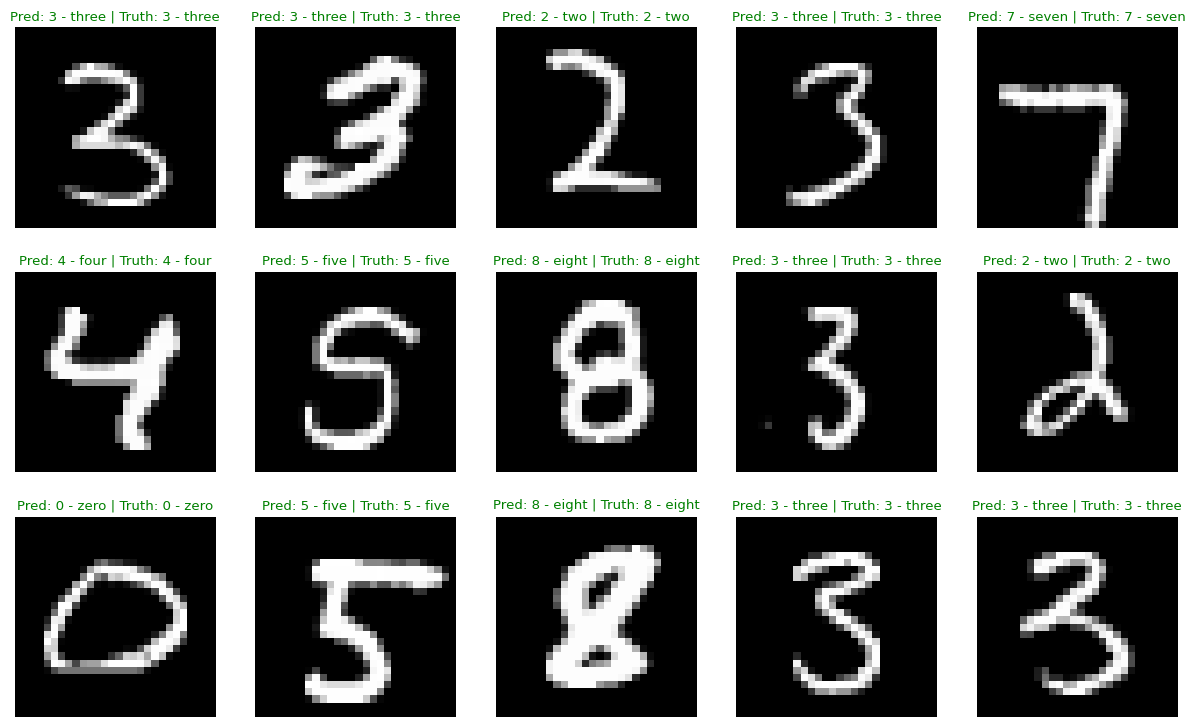

In [24]:
import random

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_dataset), k=15):
    test_samples.append(sample)
    test_labels.append(label)

pred_classes = make_predictions(model=model_gpu,
                               data=test_samples,
                               device=device).argmax(dim=1)

plt.figure(figsize=(15,9))
nrows=3
ncols=5

for i, sample in enumerate(test_samples):
    # Create subplot
    plt.subplot(nrows, ncols, i+1)
    plt.rcParams.update({'font.size': 8})

    plt.imshow(sample.squeeze(), cmap='gray')

    # Found the predictions label in text form
    pred_label = classes_names[pred_classes[i]]

    # Get the truth label
    truth_label = classes_names[test_labels[i]]

    # Create a title for the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    if pred_label == truth_label:
        plt.title(title_text, c='g')
    else:
        plt.title(title_text, c='r')

    plt.axis(False)


## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [25]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

y_preds = []
model_gpu.eval()

with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions..."):
        X, y = X.to(device), y.to(device)

        y_logit = model_gpu(X)
        y_pred = torch.argmax(torch.softmax(y_logit.squeeze(), dim=1), dim=1)

        y_preds.append(y_pred)

y_preds_tensor = torch.cat(y_preds).cpu()

y_preds_tensor[:10], test_dataset.targets[:10]

Making predictions...: 100%|██████████| 313/313 [00:00<00:00, 404.26it/s]


(tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]),
 tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]))

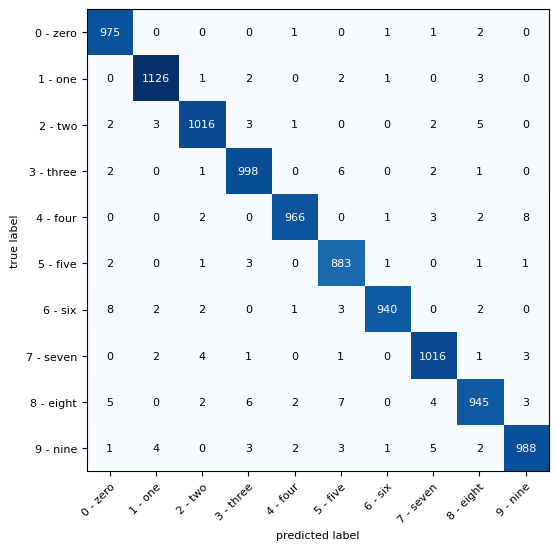

In [26]:
confmat = ConfusionMatrix(task='multiclass', num_classes=len(classes_names))
confmat_tensor = confmat(preds=y_preds_tensor,
                         target=test_dataset.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=classes_names,
    figsize=(12,6)
)


## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [27]:
dummy_tensor = torch.rand(size=(1, 3, 64, 64))
dummy_tensor.shape

torch.Size([1, 3, 64, 64])

$$ Size = {OrigSize + padding * 2 - kernelSize - 1 \over stride} $$

In [28]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=1,
                       padding=3)
print(f"Random tensor shape: {dummy_tensor.shape}")
dummy_tensor_conv = conv_layer(dummy_tensor)
print(f"Random tensor shape after convolution: {dummy_tensor_conv.shape}")

Random tensor shape: torch.Size([1, 3, 64, 64])
Random tensor shape after convolution: torch.Size([1, 10, 68, 68])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [29]:
from torchvision.datasets import FashionMNIST
fashion_train_dataset = FashionMNIST(root='data',
                                     train=True,
                                     transform=ToTensor(),
                                     download=True)

fashion_test_dataset = FashionMNIST(root='data',
                                    train=False,
                                    transform=ToTensor(),
                                    download=True)

fashion_train_dataset, fashion_test_dataset

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [30]:
fashion_classes_names = fashion_train_dataset.classes
fashion_classes_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [31]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

fashion_train_dataloader = DataLoader(dataset=fashion_train_dataset,
                                      batch_size=BATCH_SIZE,
                                      shuffle=True,)

fashion_test_dataloader = DataLoader(dataset=fashion_test_dataset,
                                     batch_size=BATCH_SIZE,
                                     shuffle=False)

len(fashion_train_dataloader), len(fashion_test_dataloader)

(1875, 313)

In [32]:
model_fashion = MNISTmodel_0(input_shape=1,
                             hidden_units=10,
                             output_shape=len(fashion_classes_names))
model_fashion

MNISTmodel_0(
  (conv_block_0): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_1): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [33]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_fashion.parameters(),
                            lr=0.01)

In [34]:
def accuracy_fn_2(y_true, y_pred):
    
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [35]:
def train_step_2(model: nn.Module,
                 data: torch.utils.data.DataLoader,
                 loss_fn: nn.Module,
                 accuracy_fn,
                 optimizer: torch.optim.Optimizer,
                 device: torch.device):
    """Function for training model"""

    train_loss, train_acc = 0, 0

    # Check if model is on GPU, if not put on GPU
    is_cuda = next(model.parameters()).is_cuda
    if not is_cuda:
        model.to(device)

    # Set model into training mode
    model.train()

    for batch, (X, y) in enumerate(data):
        X, y = X.to(device), y.to(device)

        #1. Forward pass
        y_pred = model(X)

        #2. Calculate the loss and accuracy
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))
        
        #3. Zero-grad
        optimizer.zero_grad()

        #4. Backpropagation
        loss.backward()

        #5. Optimizer step
        optimizer.step()
    
    # Calculate total loss and accuracy
    train_loss /= len(data)
    train_acc /= len(data)
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")
    


In [36]:
def test_step_2(model: nn.Module,
                data: torch.utils.data.DataLoader,
                loss_fn: nn.Module,
                accuracy_fn,
                device: torch.device):
    """Function for testing trained model"""

    test_loss, test_acc = 0, 0

    # Check if model is on GPU, if not put on GPU
    is_cuda = next(model.parameters()).is_cuda
    if not is_cuda:
        model.to(device)
    
    # Set model to evalutaion mode
    model.eval()

    with torch.inference_mode():
        for batch, (X, y) in enumerate(data):
            X, y = X.to(device), y.to(device)

            # 1. Forward pass 
            y_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(y_pred, y)
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=y_pred.argmax(dim=1))
            
        # Calculate total loss and accuracy
        test_loss /= len(data)
        test_acc /= len(data)

        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")


In [37]:
# Choose number of epochs
epochs = 10

# Choose GPU if it's available
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Start training and testing time
eval_start_time = timer()

for epoch in tqdm(range(epochs)):
    train_step_2(model=model_fashion,
                 data=fashion_train_dataloader,
                 loss_fn=loss_fn,
                 accuracy_fn=accuracy_fn,
                 optimizer=optimizer,
                 device=device)
    
    test_step_2(model=model_fashion,
                data=fashion_test_dataloader,
                loss_fn=loss_fn,
                accuracy_fn=accuracy_fn,
                device=device)

eval_end_time = timer()
eval_total_time = eval_end_time - eval_start_time
print(f"Training and testing took {eval_total_time:.3}s")


  0%|          | 0/10 [00:00<?, ?it/s]

Train loss: 1.35456 | Train acc: 51.73%


 10%|█         | 1/10 [00:08<01:14,  8.32s/it]

Test loss: 0.65455 | Test acc: 75.98%
Train loss: 0.55769 | Train acc: 79.55%


 20%|██        | 2/10 [00:16<01:04,  8.12s/it]

Test loss: 0.47535 | Test acc: 83.05%
Train loss: 0.44695 | Train acc: 84.03%


 30%|███       | 3/10 [00:24<00:56,  8.10s/it]

Test loss: 0.42534 | Test acc: 84.87%
Train loss: 0.40295 | Train acc: 85.54%


 40%|████      | 4/10 [00:32<00:48,  8.06s/it]

Test loss: 0.39617 | Test acc: 85.87%
Train loss: 0.37716 | Train acc: 86.45%


 50%|█████     | 5/10 [00:40<00:40,  8.15s/it]

Test loss: 0.37788 | Test acc: 86.31%
Train loss: 0.35747 | Train acc: 87.17%


 60%|██████    | 6/10 [00:48<00:32,  8.07s/it]

Test loss: 0.35913 | Test acc: 87.11%
Train loss: 0.34529 | Train acc: 87.57%


 70%|███████   | 7/10 [00:56<00:24,  8.00s/it]

Test loss: 0.35390 | Test acc: 87.34%
Train loss: 0.33339 | Train acc: 88.14%


 80%|████████  | 8/10 [01:04<00:16,  8.05s/it]

Test loss: 0.34296 | Test acc: 87.78%
Train loss: 0.32323 | Train acc: 88.35%


 90%|█████████ | 9/10 [01:12<00:07,  7.88s/it]

Test loss: 0.33161 | Test acc: 88.21%
Train loss: 0.31414 | Train acc: 88.67%


100%|██████████| 10/10 [01:19<00:00,  7.96s/it]

Test loss: 0.32013 | Test acc: 88.41%
Training and testing took 79.6s


In [38]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # Forward pass (model outputs raw logits)
            pred_logits = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

            # Get pred_prob off the GPU for futher calculation
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs).argmax(dim=1)

In [39]:
import random

test_samples = []
test_labels = []

for sample, label in random.sample(list(fashion_test_dataset), k=15):
    test_samples.append(sample)
    test_labels.append(label)

test_labels[0]

2

Text(0.5, 1.0, 'Pullover')

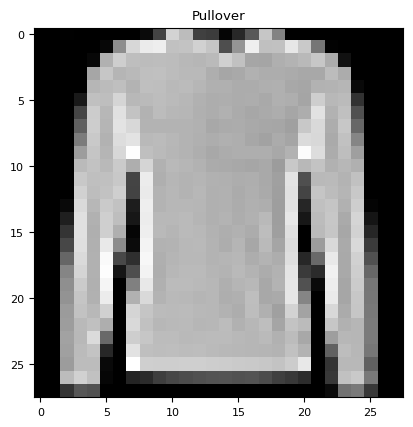

In [40]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(fashion_classes_names[test_labels[0]])

In [41]:
# Make predictions 
pred_probs = make_predictions(model=model_fashion,
                              data=test_samples,
                              device=device)
pred_probs

tensor([2, 1, 5, 9, 8, 5, 9, 3, 9, 2, 7, 2, 1, 0, 7])

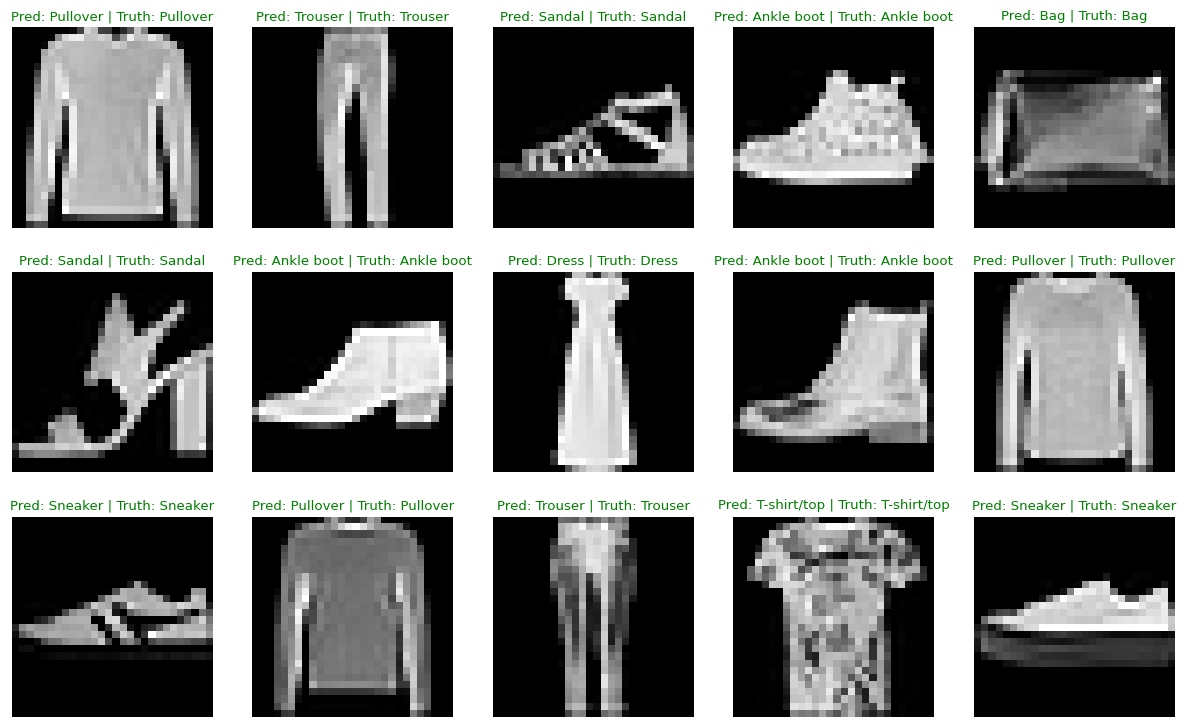

In [42]:
plt.figure(figsize=(15,9))
nrows = 3
ncols = 5

for i, sample in enumerate(test_samples):

    plt.subplot(nrows, ncols, i+1)
    plt.rcParams.update({'font.size': 8})

    plt.imshow(sample.squeeze(), cmap='gray')

    # Prediction label in text form
    pred_label = fashion_classes_names[pred_probs[i]]

    # Get the truth label
    truth_label = fashion_classes_names[test_labels[i]]

    # Create a title for the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    if pred_label == truth_label:
        plt.title(title_text, c='g')
    else:
        plt.title(title_text, c='r')

    plt.axis(False)


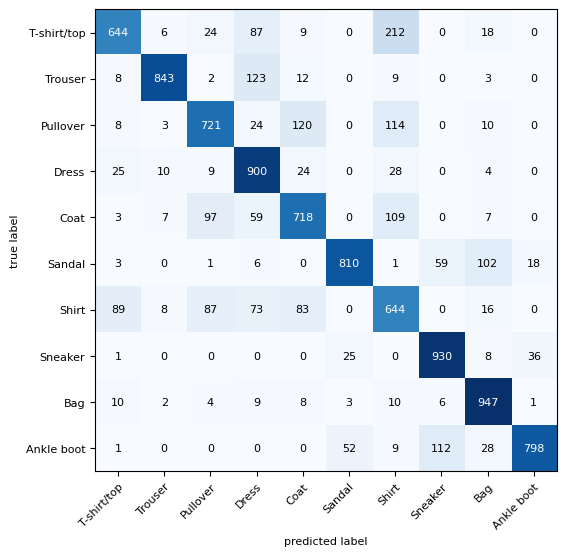

In [46]:
from mlxtend.plotting import plot_confusion_matrix
from torchmetrics import ConfusionMatrix

preds_data = []
model_fashion.eval()

with torch.inference_mode():
    for X, y in fashion_test_dataloader:
        X, y = X.to(device), y.to(device)

        y_logit = model_fashion(X)
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
        preds_data.append(y_pred.cpu())

y_preds_data = torch.cat(preds_data)

confmat = ConfusionMatrix(task='multiclass', num_classes=len(fashion_classes_names))
confmat_tensor = confmat(preds=y_preds_data,
                         target=fashion_test_dataset.targets)

fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names=fashion_classes_names,
    figsize=(12,6)
)